<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Braden Solt

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

In order to determine $c$, the CDF must be computed and must be equal to one at $F(\infty)$. The calculation is as follows.
$$F(X) = \int_{0}^{X}c \ x \ e^{\big(-\frac{x^2}{10}\big)}dx$$
Let $u = \big(-\frac{x^2}{10}\big)$, then $du = -\frac{1}{5} x \ dx$, and
$$F(X) = \int_{0}^{X}c \ x \ e^{u} \frac{-5}{x} du = \int_0^{X} -5 c e^u du = -5 c e^u +k= -5 c e^{\big(-\frac{x^2}{10}\big)}+k$$
$$F(\infty) = 1 = \lim_{X\rightarrow \infty} F(X) = k \therefore k = 1$$
$$F(0) = 0 = 1-5 c e^{\big(-\frac{x^2}{10}\big)}\rightarrow 1=5c \therefore c = \frac{1}{5}$$

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

From the above work, it was assumed that $\lim_{x\rightarrow \infty}F(x) = 1$ when calculating $c, k$, which makes this true by definition. $F(0)=0$ should be true because the pdf is $0$ for all negative values. This can be verified by the following calculation.
$$F(0) =1- e^{\big(-\frac{0^2}{10}\big)} = e^0 = 0$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

When the CDF is already known, the median can be computed by finding where $F(\tilde{x}) = 1/2$. The following calculation does this...
$$F(\tilde{x}) = \frac{1}{2} = 1-e^{\big(-\frac{\tilde{x}^2}{10}\big)} \rightarrow \frac{1}{2} = e^{\big(-\frac{\tilde{x}^2}{10}\big)}\rightarrow -\ln(2) = \big(-\frac{\tilde{x}^2}{10}\big) $$
$$\therefore \tilde{x} = \sqrt{10\ln(2)} \approx 2.63277$$

In [2]:
import math
# Calculator python
print("{:6g}".format(math.sqrt(10*math.log(2))))

2.63277


**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

The probability that a storm exceeds 6 feet is equivalent to unity minus the probability that the storm does not exceed six feet. Our CDF can be used to compute this, by evaluting the probability that a storm is at most six feet as $F(6)$. Then the probability of the complement as $1-F(6) as follows$

$$F(6) = 1-e^{\big(-\frac{6^2}{10}\big)} = 97.2376\%\therefore 1-F(6) = 2.73237\%$$

In [3]:
import math

# CDF function hooray!
def storm_cdf(x):
    return 1-math.exp(-x**2/10)

print("F(6) = {:6g}".format(storm_cdf(6)))
print("1-F(6) = {:6g}".format(1-storm_cdf(6)))

F(6) = 0.972676
1-F(6) = 0.0273237


**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

The probability $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$ can be computed by first assuming that the frequency and severity of the storms is independent, and the severity of each storm is independent. <sup>This isn't the best ever assumption, but isn't that unrealistic either.</sup> This assumption allows the probability to be broken up as follows.
$$P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$ = P(3 \text{ storms}) \big(P(\text{ non-Octogeddon storms})\big)^3$$

In this expression, the first probability (probability of three storms per year) can be found via a Poisson distribution with $\lambda = 5, \ k=3$. Thusly, 
$$P(3 \text{ storms}) = \frac{\lambda^k}{k!}e^{-\lambda}=14.0374\%$$

And as shown in **Part D**, $P(\text{ non-Octogeddon storms}) = F(6) = 97.2376\%$, so it is in fact very likely that any given storm will *not* cause an 'Octogeddon'. Thus, we should not expect this condition to lower the odds too much. Here's the computation.

$$P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$ = (14.0376\%) (97.2376\%)^3 = 12.9179\%$$





In [4]:
from scipy.stats import poisson

lam = 5;
k = 3;

print("P(3 storms) = {:6g}".format(poisson.pmf(k,lam)))
print("P(3 storms)*P(non-octogeddon stroms)= {:6g}".format( poisson.pmf(k,lam) * (storm_cdf(6)**3) ))

P(3 storms) = 0.140374
P(3 storms)*P(non-octogeddon stroms)= 0.129179


<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

The numbers of customers who pass through each line a given 10-minute interval can be modelled by a Poisson distribution. The rate $\lambda$ will equal 0.4 for John, 0.5 for a working machine, and 0.1 for a frozen up machine, the units on this would be customers per minute. For the machine the distributions, for either working or not working, can be added together after multiplying by their probability, 0.9 and 0.1, respectively.

John's distribution:
$$P_{John}(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$$
Machine:
$$P_{Machine}(X=k) = 0.9\frac{\lambda_{working}^k}{k!}e^{-\lambda_{working}}+0.1\frac{\lambda_{frozen}^k}{k!}e^{-\lambda_{frozen}}$$

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

The below codes calculate this problem based on the formula for a Poisson distribution, as shown in Part A. Before the formula can be applied, $\lambda$ must by multiplied by the number of minutes to properly scale the result. This is like saying that probability of $k$ events in 10 minutes with rate $\lambda$ is equivalent to the probability of $k$ events in 10 minutes with rate $10\lambda$

General Poisson Distribution: $P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$

In [5]:
from math import exp,factorial
lamj = 0.4

def john_P(k,minutes):
    lam = lamj*minutes
    return lam**k/(factorial(k)) * exp(-lam)

k = 6
print("The probability of 6 customers pass through John's machine in 10 mintes is {:.6g}%".format(100*john_P(k,10)))

The probability of 6 customers pass through John's machine in 10 mintes is 10.4196%


In [6]:
# working machine
lamw = 0.5

def working_P(k,minutes):
    lam = lamw*minutes
    return lam**k/(factorial(k)) * exp(-lam)

k = 6
print("The probability of 6 customers pass through the line of a working machine in 10 mintes is {:.6g}%".format(100*working_P(k,10)))

The probability of 6 customers pass through the line of a working machine in 10 mintes is 14.6223%


In [7]:
# frozen machine
lamf = 0.1

def frozen_P(k,minutes):
    lam = lamf*minutes
    return lam**k/(factorial(k)) * exp(-lam)

k = 6
print("The probability of 6 customers pass through the line of a frozen machine in the next 10 mintes is {:.6g}%".format(100*frozen_P(k,10)))

The probability of 6 customers pass through the line of a frozen machine in the next 10 mintes is 0.0510944%


**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

The law of total probability states that $P(E) = P(E\mid A) P(A) + P(E\mid A^C) P(A^C)$, given that $A\cup A^C = \Omega$. For this problem E would be the event that 6 customers pass through the machine's line in 10 minutes, and A is the event where the machine is broken. These probabilities are known from the calculations in **Part B** for $P(E)$ and $P(A), P(A^C)$ are given as 90% and 10%, respectively. The caluclation therefor is as follows

$$P(E) = 0.146 \cdot 0.9 + 0.000511 \cdot 0.1 = 13.165\%$$

In [8]:
k = 6
print("The probability of 6 customers pass through the machine's line in the next 10 mintes is {:.6g}%".format(90*working_P(k,10)+10*frozen_P(k,10)))

The probability of 6 customers pass through the machine's line in the next 10 mintes is 13.1652%


**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

The probability that an event will happen k *or more* times, can be described by a sum of Poisson distributions as follows where $\lambda = 0.4\cdot 300 = 120$, $k=100$
$$P(X>k)=\sum_{i=k}^\infty \frac{\lambda^i}{i!}e^{-\lambda} = e^{-\lambda} \sum_{i=k}^\infty \frac{\lambda^i}{i!} = 1-e^{-\lambda}\sum_{i=0}^{k} \frac{\lambda^i}{i!}$$
Luckily, the CDF of a discrete Poisson distribution is known in terms of the incomplete, upper gamma function, $\Gamma(s,x) = \int_x^\infty t^{s-1}e^{-t} dt$ as,
$$F(x) = \frac{\Gamma(k+1,\lambda)}{k!} = \frac{\int_\lambda^\infty t^{k}e^{-t} dt}{k!}$$
plugging in the values for this problem yields
$$F(x) = \frac{\int_{120}^\infty t^{120}e^{-t} dt}{120!}$$
This is the exact probability without rounding... I'm not solving that without rounding, but with rounding, we can just use python

In [9]:
from scipy.stats import poisson

k=100
lam = 0.4*300

print("The probability that John serves 100 or more customers in his 5 hour shift is {:6g}%"
      .format(100*(1-poisson.cdf(k,lam)))
     )

The probability that John serves 100 or more customers in his 5 hour shift is 96.5332%


**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [10]:
def checkout_count(time_len, rate_work, rate_broken, p, N_sim=int(10e3), max_count = int(1e3)):
    
#     Generate bernoulli RVs for if the machine is working
#     Note: first dimension spans customers, second dimension spans 'simulations'
    working = np.random.binomial(1,p,size=(max_count,N_sim))
#     Generate the rates based on whether the machine is working
    lam = (rate_work*working + #This term is for working rates
           rate_broken*np.logical_not(working) #This term is for non-working rates
          )
#     Get time from exponential distribution
    time = np.random.exponential(1/lam,size=(max_count,N_sim))
#     Deterimine which times are within limits by performing cumulative sum
    in_time = np.cumsum(time,axis=0)<time_len
#     Find numbers of customers served
    count = np.cumsum(in_time,axis=0)
#     Get last customer served for each simulation
    num_customers = count[-1,:]
    
    return num_customers

The above code defines the simulation function using numpy methods and with a default simulation count of 10,000 simulations. Only six lines are needed because numpy arrays are utilized, where each element in these arrays represents one simulation.

The below code tests the simulation code with given parameters, and consistently yields answers around 107 customers for the machine and 120 customers for John.

In [11]:
# Test the function with default parameters
rate_work = 0.5
rate_broken = 0.1
p = 0.9
time_len = 5*60 #5 hours in minutes
N_sim = int(10e3)
# get counts
count = checkout_count(time_len,rate_work,rate_broken,p,N_sim=N_sim)
# calculate odds
odds100 = (count>100).sum()/N_sim

print(count.mean(), "Customers were served in the machine simulation on average")
print("The odds that more than 100 customers were served is ", 100*odds100, "%")

107.8001 Customers were served in the machine simulation on average
The odds that more than 100 customers were served is  68.33 %


In [12]:
# Test the function for John's parameters
rate_work = 0.4
rate_broken = 0
p = 1
time_len = 5*60 #5 hours in minutes
N_sim = int(10e3)
# get counts
count = checkout_count(time_len,rate_work,rate_broken,p,N_sim=N_sim)
# calculate odds
odds100 = (count>100).sum()/N_sim

print(count.mean(), "Customers were served in the machine simulation on average")
print("The odds that more than 100 customers were served is ", 100*odds100, "%")

120.0511 Customers were served in the machine simulation on average
The odds that more than 100 customers were served is  96.87 %


**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

Based on the simulation in **Part E**, it is evident that John it much more likely to serve over 100 customers in a five hour shift than the machine, because he never freezes. This at first, this fact makes it seem like John is a much better investment for the grocery store. And this would definitely be true if both John and the self-checkout machine are working for free. However, John requires a minimum hourly wage to be paid and may want benefits such as healthcare and vacation days. This is ridiculous compared to what the machine offers. The machine is apathetic; the machine is consistent; the machine does not take sick days; the machine works for pennies worth of electricity. If the full cost of John and the machine are to be considered for the grocery store, the machine will always win. If you don't care about money, which is a ridiculous thing to not care about, then John is technically better.

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

The below function implemets the natural odds for any input $x=1,2,...,9$. For incorrect inputs, the function returns -1. The fuction can be confirmed to be a well-defined probability mass function by summing all possible inputs. If the function is well defined, the summed proability should be 1 in total, which it is. So that's good.

In [13]:
def pmf_natural(x):
    if x not in range(1,10):
        return -1
    return math.log10((x+1)/x)

accumulate = 0;

for x in range(1,10):
    accumulate += pmf_natural(x)

print("The odds of the leading digit being any digit is {:3g}%".format(100*accumulate))

The odds of the leading digit being any digit is 100%


**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

My bar plots are on the same axes I hope that's okay

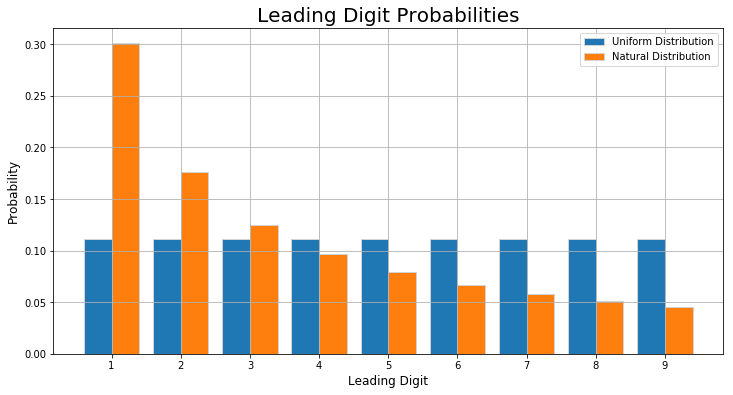

In [14]:
p_uni = 1/9*np.ones(9);
p_nat = np.zeros(9);

digits = range(1,10)

for d in digits:
    p_nat[d-1] = pmf_natural(d);
    
fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.bar(digits-0.2*np.ones(9),p_uni,
        width = 0.4,
        edgecolor = "lightgray",
        label="Uniform Distribution")
plt.bar(range(1,10)+0.2*np.ones(9),p_nat,
        width = 0.4,
        edgecolor = "lightgray",
        label="Natural Distribution")
plt.grid(True)
plt.title("Leading Digit Probabilities",fontsize=20)
plt.xlabel("Leading Digit",fontsize=12)
ax.set_ylabel("Probability",fontsize=12)
ax.set_xticks(digits)
ax.legend()

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [15]:
def cdf_natural(y):
    cdf = 0
    for x in range(1,y+1):
        cdf += pmf_natural(x)
    return cdf  

print("The probability that the leading digit is at most 4 is {:.4f}%".format(100*cdf_natural(4)))
print("The probability that the leading digit is at most 5 is {:.4f}%".format(100*cdf_natural(5)))

The probability that the leading digit is at most 4 is 69.8970%
The probability that the leading digit is at most 5 is 77.8151%


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

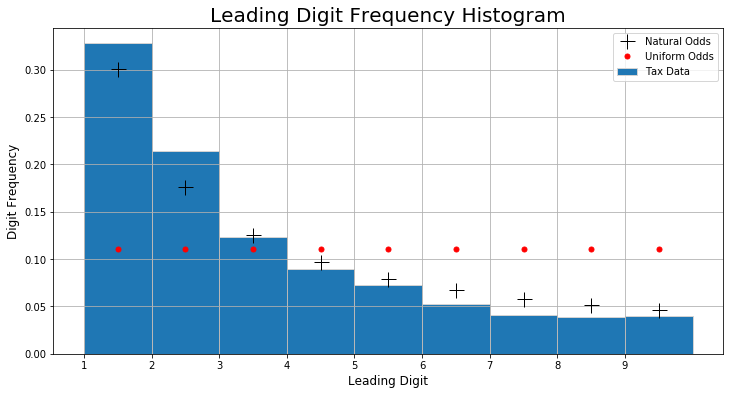

In [16]:
df = pd.read_csv("tax_data.txt",sep='\t',header=0)
# this fun little line gets us the leading digits in a series of ints, nice!
ld = df["Tax Incomes"].dropna().astype(str).str[0].astype(int)
fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.grid(True)
plt.hist(ld,
         bins=range(1,11),
         density=True,
         edgecolor="lightgray",
        label = "Tax Data")
plt.plot(digits+0.5*np.ones(9),p_nat,'k+',
         markersize=15,
        label= "Natural Odds")
plt.plot(digits+0.5*np.ones(9),p_uni,'r.',
         markersize=10,
        label= "Uniform Odds")
plt.title("Leading Digit Frequency Histogram",fontsize=20)
plt.xlabel("Leading Digit",fontsize=12)
plt.ylabel("Digit Frequency",fontsize=12)
ax.set_xticks(digits)
ax.legend()

This dataset is unlikely to be fraudulent because the frequency of leading digits is closer to the natural odds than the uniform odds. This is evident in the above plot, because the height of the bins is closer to the plus marks than the red dots.

### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

The probability of Tony winning the series can be described by a binomial. This is described by the product of the odds of Tony winning 5 duels, $p^5$ and loses 3 duels, (1-p)^3. The number of combinations is a distribution of the losses among the first 7 games, ${7 \choose 3}$. The total odds of this event is therefore $P(E) = {7 \choose 4} p^5 (1-p)^3$. This an example of a negative binomial distribution with the general formula $P(k,r) = {k-1 \choose r-1} p^r (1-p)^{k-r}$, Specifically, the odds that tony will win the series in 8 duels is $NB(8,5)$, calculated below as $3.83\%$, and to win in $k$ games is $NB(k,5)$

In the scipy object `nbinom`, the first argument, $k$ is actually the number of losses, because of its definition.

In [17]:
from scipy.stats import nbinom

p=0.56

print( "The odds that Tony wins the series in 8 games is {:.2f}%".format( 100*nbinom.pmf(3,5,p) ) )

The odds that Tony wins the series in 8 games is 16.42%


**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

The event that Tony wins in any matter is the union of disjoint scenarios that he wins in 5,6,7,8, or 9 duels. Let these events be denoted by $E_5$ to $E_9$. These events are disjoint because it is impossible for tony to win in two different numbers of duels. The total odds are a sum of the five disjoint negative binomial distributions.

The total probability that Tony will win the series overall is the sum of the probabilities of $E_5$ to $E_9$. This is calculated below as

In [18]:
prob = 0

for k in range(5):
    prob += nbinom.pmf(k,5,p)

print( "The total probability that Tony wins the series is {:.2f}%".format( 100*prob ) )

The total probability that Tony wins the series is 64.49%


**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of \$90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home \$10,000 _minus_ \$450 for Darth Ketelsen's fees, for a total payout of \$9,550.  What is the expected payout for a 9-duel series?   

The Expected value of the payout can be computed by multiplying Tony's payout by the odds that Tony wins calculated in **Part B**.
$$E[\text{Payout}] = 9550\$ \cdot P(E_{4\rightarrow9})$$

In [19]:
payout9 = prob*9550

print( "The Excpected Payout if Tony accepts Ketelsen's services is {:.2f}".format( payout9 ) )

The Excpected Payout if Tony accepts Ketelsen's services is 6158.39


**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

The optimal number of games Tony should play can be computed by considering the expected payout value for each odd number of duels $N$. First we must compute the odds that Tony wins a series of N duels, and the payout he will recieve from wining each series. The product of these two results will be the expected value of Tony's payout which will be optimum at the maximum expected value.

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [20]:
def optimal_series(p,plot=True):
#     Winnings from tourney
    winnings = 10e3
#     Valid values for number of rounds, odd numbers 3--99
    N_list = range(3,99,2)
#     Define expected list
    expected = [0] * len(N_list)
    for i,N in enumerate(N_list):
#         Set default probability
        prob = 0
#         Number of games needed to win the series will be N//s (rounds down so add 1)
        to_win = N//2 + 1
#         Find the total probability by adding together the disjoint cases
        for losses in range(to_win):
            prob += nbinom.pmf(losses, to_win, p)
#         Get payout for this N
        payout = winnings-90*to_win
#         Store this expected value in the list
        expected[i] = payout * prob
#     So this is the index of expected corresponding to the max expected value used to get the corresponding N
    optimal_series_length = N_list[expected.index(max(expected))]
#     Do plotting
    if(plot):
        plt.subplots(1,1,figsize=(12,6))
        plt.plot(N_list,expected,'b.-',
                markersize=10)
        plt.grid(True)
        plt.xlabel('Series Length',fontsize=12)
        plt.ylabel('Expected Payout, USD',fontsize=12)
        plt.title('Expected Payout for Every Series Length',fontsize=20)
    return optimal_series_length

27

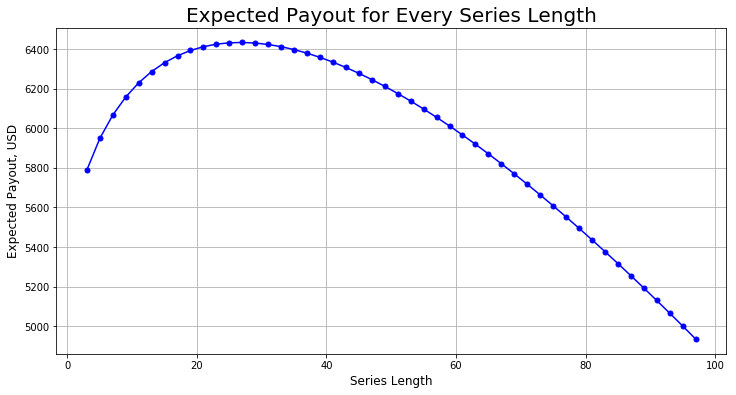

In [21]:
optimal_series(p)

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [22]:
vals = ["{}".format(x) for x in range(2,11)] + ["Jack", "Queen", "King", "Ace"]
suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
cards = [(v,s) for s in suits for v in vals]
print("Every Fourth card is described by\n",cards[0:52:4])

# define number of simulations as 100 thou
N_sim = int(10e4)

# Let's make some arrays y'all
# random pairs which can't be the same in the 0 axis
draw = np.random.choice(range(len(cards)),size=(2,N_sim),replace=(False,True))
value = ( ( draw%13 ) + 2 ) 
# Note: the constant 2 is added just so that 2 is the lowest value and ace is 14, but it really doesn't matter that much
dist = abs(np.diff(value,axis=0))
prob = (dist<2).sum()/N_sim

print("\nThe Probability that two sequentially drawn, random cards are a pair or of adjacent value is {:.2f}%".format(100*prob) )

Every Fourth card is described by
 [('2', 'Hearts'), ('6', 'Hearts'), ('10', 'Hearts'), ('Ace', 'Hearts'), ('5', 'Diamonds'), ('9', 'Diamonds'), ('King', 'Diamonds'), ('4', 'Clubs'), ('8', 'Clubs'), ('Queen', 'Clubs'), ('3', 'Spades'), ('7', 'Spades'), ('Jack', 'Spades')]

The Probability that two sequentially drawn, random cards are a pair or of adjacent value is 21.90%


**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

In [23]:
N_sim = int(1e5)
# Draw three cards N_sim times
draw = np.random.choice(range(len(cards)),size=(3,N_sim),replace=(False,True))
# Determine the sorted values of our cards
value = ( ( draw%13 ) + 2 )
value = np.sort(value,axis=0)
# The dists will be [1 1] if we have a run of 3
dist = np.diff(value,axis=0)
prob = np.logical_and(dist[0,:]==1,dist[1,:]==1).sum() / N_sim
print("The Probability that three sequentially drawn, random cards form a 3-card run is {:.2f}%".format(100*prob) )

The Probability that three sequentially drawn, random cards form a 3-card run is 2.93%


**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?

In [24]:
N_sim = int(1e5)
# Draw 24 cards N_sim times b/c we don't care about the rest of the deck
draw = np.random.choice(range(len(cards)),size=(24,N_sim),replace=(False,True))
# Determine the sorted values of our cards
value = ( ( draw%13 ) + 2 )
# Find our aces
aces  = (value==14)
# Count our aces
ace_count = np.cumsum(aces,axis=0)
# Throw out every ace that's not the third ace b/c we hate it
after_third_ace = ( ace_count==3 )
# Find the third ace index using argmax (defaults to first True value)
third_ace = np.argmax(after_third_ace,axis=0)
# The probability is taken from the number of third aces drawn after index 14, or after flip 15
prob = (third_ace>14).sum()/N_sim
# Print some results
print("The Probability that the third ace in a shuffled deck will be between the 16th and 24th position is {:.2f}%".format(100*prob) )

The Probability that the third ace in a shuffled deck will be between the 16th and 24th position is 17.56%


**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.

Text(0,0.5,'Probability')

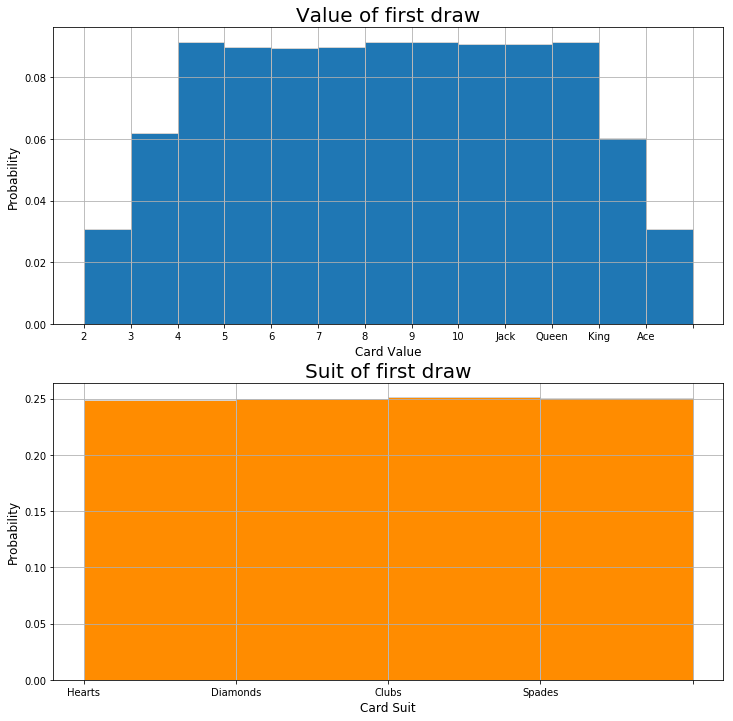

In [25]:
N_sim = int(5e6)
# Draw three cards N_sim times
draw = np.random.choice(range(len(cards)),size=(3,N_sim),replace=(False,True))
# Determine the sorted values of our cards
value = ( ( draw%13 ) + 2 )
value_sort = np.sort(value,axis=0)
# The dists will be [1 1] if we have a run of 3
dist = np.diff(value_sort,axis=0)
# runs logical array tells us which draws contain runs
runs = np.logical_and(dist[0,:]==1,dist[1,:]==1)
# firsts is the array of values of first draws which contin runs
firsts = value[0,runs]
# First plot
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(2,1,1)
plt.hist(firsts,bins=range(2,16),
         density=True,
        edgecolor = "lightgray");
plt.grid(True)
plt.xticks(range(2,16),vals);
plt.title("Value of first draw",fontsize=20)
plt.xlabel("Card Value",fontsize=12)
plt.ylabel("Probability",fontsize=12)
# this array holds the values for the first card's suit.
first_suit = draw[0,runs]//13
# Suit histogram plot just cause
ax = plt.subplot(2,1,2)
plt.hist(first_suit,bins = range(5),
          density=True,
          color="darkorange",
          edgecolor="lightgray")
plt.grid(True)
plt.xticks(range(5),suits);
plt.title("Suit of first draw",fontsize=20)
plt.xlabel("Card Suit",fontsize=12)
plt.ylabel("Probability",fontsize=12)

The above plots show the pmf found for the value and suit of the first card drawn of three, given that the three draw cards form a three card run. It is evident that the probability of each suit should be an equal $\frac{1}{4}$. The histogram for the value of the first card is slightly more interesting. It can be seen from the value histogram plot, that most cards have equal probability, except for the highest and lowest values. The values 2 and Ace are the lowest and highest card values, respectively, and they are the least likely to be part of a run simply because there is only one three card run possible for each card, 2-3-4, and Q-K-A, respectively. The other outliers are the next more median card values, 3 and King. For these cards only two three card runs are possible, giving them a higher probability than the 2 and Ace. For all other cards, three three card runs are possible, so their probabilities are approximately equal. The fact that the first card is sampled is irrelevant to the sampling because the order that the cards are drawn in was ignored.